<a href="https://colab.research.google.com/github/sushirito/Molecular-Dynamics/blob/main/visuals_collocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

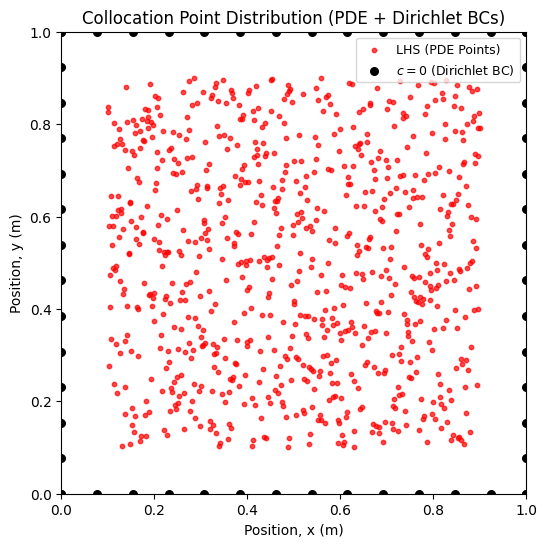

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import qmc

# Define domain boundaries
x_min, x_max = 0, 1
y_min, y_max = 0, 1

# Number of points
num_pde = 500  # Collocation points (LHS in interior)
num_bc = 100   # Boundary condition points (uniform)
num_ic = 100   # Initial condition points (uniform along x-y plane at t=0)

# Generate Latin Hypercube Sampling (LHS) for PDE collocation points inside the domain (excluding edges)
sampler = qmc.LatinHypercube(d=2)
lhs_points = sampler.random(num_pde)
lhs_points = qmc.scale(lhs_points, [x_min+0.1, y_min+0.1], [x_max-0.1, y_max-0.1])  # Avoid edges

# Generate Uniform Boundary Points (explicitly gridded to ensure visual clarity)
bc_x = np.linspace(x_min, x_max, int(np.sqrt(num_bc)))
bc_y = np.linspace(y_min, y_max, int(np.sqrt(num_bc)))
bc_top = np.array([[x, y_max] for x in bc_x])
bc_bottom = np.array([[x, y_min] for x in bc_x])
bc_left = np.array([[x_min, y] for y in bc_y])
bc_right = np.array([[x_max, y] for y in bc_y])
bc_points = np.vstack([bc_top, bc_bottom, bc_left, bc_right])

# Generate Initial Condition Points (Explicitly Gridded for Clarity)
ic_x = np.linspace(x_min, x_max, int(np.sqrt(num_ic)))
ic_y = np.linspace(y_min, y_max, int(np.sqrt(num_ic)))
ic_xx, ic_yy = np.meshgrid(ic_x, ic_y)
ic_points = np.vstack([ic_xx.ravel(), ic_yy.ravel()]).T

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot PDE collocation points
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], color='red', s=15, alpha=0.7, label='LHS (PDE Points)')

# Plot boundary condition points (black for Neumann, green/blue for Dirichlet)
ax.scatter(bc_right[:, 0], bc_right[:, 1], color='black', s=40, label=r'$\partial c / \partial x = 0$ (Neumann BC)', edgecolors='black')
ax.scatter(bc_top[:, 0], bc_top[:, 1], color='black', s=40, edgecolors='black')
ax.scatter(bc_bottom[:, 0], bc_bottom[:, 1], color='black', s=40, edgecolors='black')

# Mark Dirichlet boundary conditions with color
ax.scatter(bc_left[:len(bc_left)//3, 0], bc_left[:len(bc_left)//3, 1], color='green', s=40, label=r'$c = 0$ (Dirichlet BC)')
ax.scatter(bc_left[len(bc_left)//3:2*len(bc_left)//3, 0], bc_left[len(bc_left)//3:2*len(bc_left)//3, 1], color='blue', s=40, label=r'$c = C_0$ (Dirichlet BC)')
ax.scatter(bc_left[2*len(bc_left)//3:, 0], bc_left[2*len(bc_left)//3:, 1], color='green', s=40)

# Set labels and style
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel("Position, x (m)")
ax.set_ylabel("Position, y (m)")
ax.set_title("Collocation Point Distribution (PDE + BCs)")
ax.legend(loc='upper right', fontsize=9, frameon=True)
ax.grid(False)

# Show plot
plt.show()


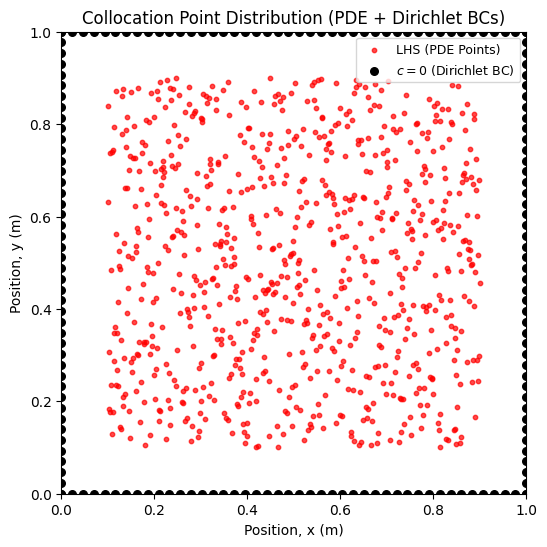

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import qmc

# Define domain boundaries
x_min, x_max = 0, 1
y_min, y_max = 0, 1

# Number of points (increased density for clearer visualization)
num_pde = 800   # Collocation points (LHS in interior)
num_bc = 2000    # Boundary condition points (uniform, increased for visibility)
num_ic = 200    # Initial condition points (uniform, increased for clarity)

# Generate Latin Hypercube Sampling (LHS) for PDE collocation points inside the domain (excluding edges)
sampler = qmc.LatinHypercube(d=2)
lhs_points = sampler.random(num_pde)
lhs_points = qmc.scale(lhs_points, [x_min+0.1, y_min+0.1], [x_max-0.1, y_max-0.1])  # Avoid edges

# Generate Uniform Boundary Points (explicitly gridded for clearer visualization)
bc_x = np.linspace(x_min, x_max, int(np.sqrt(num_bc)))
bc_y = np.linspace(y_min, y_max, int(np.sqrt(num_bc)))
bc_top = np.array([[x, y_max] for x in bc_x])
bc_bottom = np.array([[x, y_min] for x in bc_x])
bc_left = np.array([[x_min, y] for y in bc_y])
bc_right = np.array([[x_max, y] for y in bc_y])
bc_points = np.vstack([bc_top, bc_bottom, bc_left, bc_right])

# Generate Initial Condition Points (Explicitly Gridded for Clarity)
ic_x = np.linspace(x_min, x_max, int(np.sqrt(num_ic)))
ic_y = np.linspace(y_min, y_max, int(np.sqrt(num_ic)))
ic_xx, ic_yy = np.meshgrid(ic_x, ic_y)
ic_points = np.vstack([ic_xx.ravel(), ic_yy.ravel()]).T

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot PDE collocation points (red, dense in the interior)
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], color='red', s=10, alpha=0.7, label='LHS (PDE Points)')

# Plot Dirichlet boundary conditions all around (increased density for thicker mapping)
ax.scatter(bc_points[:, 0], bc_points[:, 1], color='black', s=30, label=r'$c = 0$ (Dirichlet BC)', edgecolors='black')

# Set labels and style
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel("Position, x (m)")
ax.set_ylabel("Position, y (m)")
ax.set_title("Collocation Point Distribution (PDE + Dirichlet BCs)")
ax.legend(loc='upper right', fontsize=9, frameon=True)
ax.grid(False)

# Show plot
plt.show()

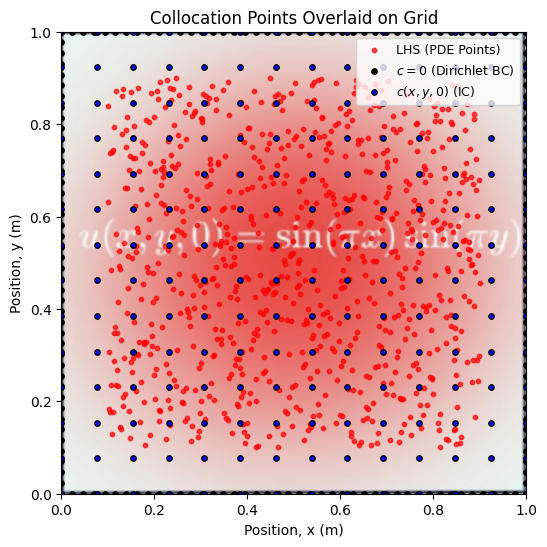

In [7]:
import matplotlib.image as mpimg

# Placeholder image path (replace with actual image path when available)
image_path = "/content/2D_img.png"

# Load image
img = mpimg.imread(image_path)

# Create figure with image background
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img, extent=[x_min, x_max, y_min, y_max], aspect='auto')

# Overlay PDE collocation points (red, dense in the interior)
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], color='red', s=10, alpha=0.7, label='LHS (PDE Points)')

# Overlay Dirichlet boundary conditions (black, increased density)
ax.scatter(bc_points[:, 0], bc_points[:, 1], color='black', s=15, label=r'$c = 0$ (Dirichlet BC)', edgecolors='black')

# Overlay Initial Condition Points (Blue)
ax.scatter(ic_points[:, 0], ic_points[:, 1], color='blue', s=15, label=r'$c(x,y,0)$ (IC)', edgecolors='black')

# Set labels and style
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel("Position, x (m)")
ax.set_ylabel("Position, y (m)")
ax.set_title("Collocation Points Overlaid on Grid")
ax.legend(loc='upper right', fontsize=9, frameon=True)
ax.grid(False)

# Show plot
plt.show()

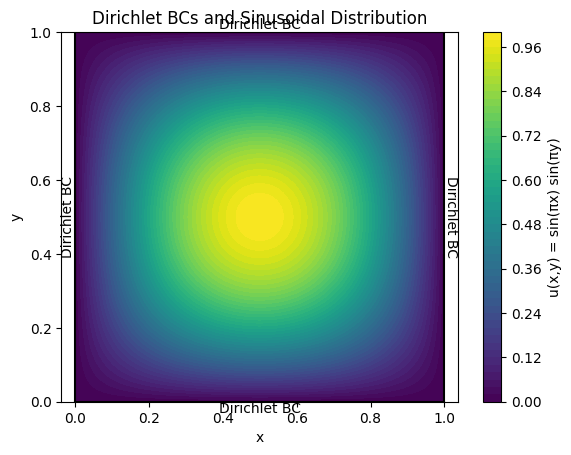

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create the grid
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)

# Define the sinusoidal function
Z = np.sin(np.pi * X) * np.sin(np.pi * Y)

# Plot the contour
plt.figure()
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='u(x,y) = sin(πx) sin(πy)')

# Draw and label Dirichlet boundaries
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.text(0.5, 0, 'Dirichlet BC', ha='center', va='top')
plt.text(0.5, 1, 'Dirichlet BC', ha='center', va='bottom')
plt.text(0, 0.5, 'Dirichlet BC', ha='right', va='center', rotation=90)
plt.text(1, 0.5, 'Dirichlet BC', ha='left', va='center', rotation=-90)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Dirichlet BCs and Sinusoidal Distribution')
plt.axis('equal')
plt.show()


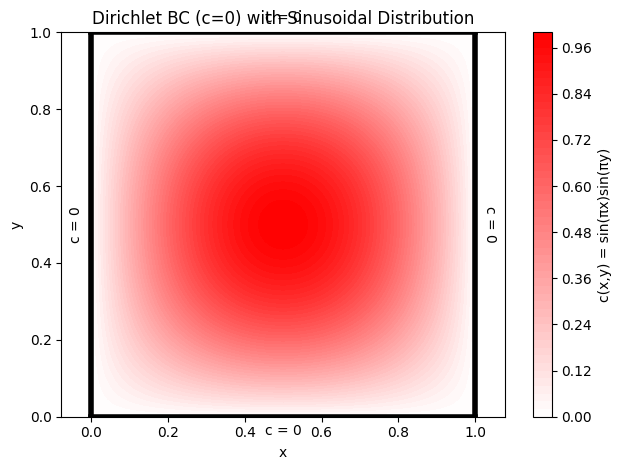

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create grid
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)

# Define the sinusoidal function
Z = np.sin(np.pi * X) * np.sin(np.pi * Y)

# Define a red-to-white colormap
colors = ["white", "red"]
cmap = LinearSegmentedColormap.from_list("white_red", colors)

# Plot the contour
plt.figure()
contour = plt.contourf(X, Y, Z, levels=50, cmap=cmap)
plt.colorbar(contour, label='c(x,y) = sin(πx)sin(πy)')

# Draw thick black boundaries for Dirichlet BC (c=0)
lw = 4
plt.plot([0, 1], [0, 0], 'k', linewidth=lw)
plt.plot([0, 1], [1, 1], 'k', linewidth=lw)
plt.plot([0, 0], [0, 1], 'k', linewidth=lw)
plt.plot([1, 1], [0, 1], 'k', linewidth=lw)

# Label boundary as c=0
plt.text(0.5, -0.02, 'c = 0', ha='center', va='top', color='black')
plt.text(0.5, 1.02, 'c = 0', ha='center', va='bottom', color='black')
plt.text(-0.02, 0.5, 'c = 0', ha='right', va='center', rotation=90, color='black')
plt.text(1.02, 0.5, 'c = 0', ha='left', va='center', rotation=-90, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Dirichlet BC (c=0) with Sinusoidal Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

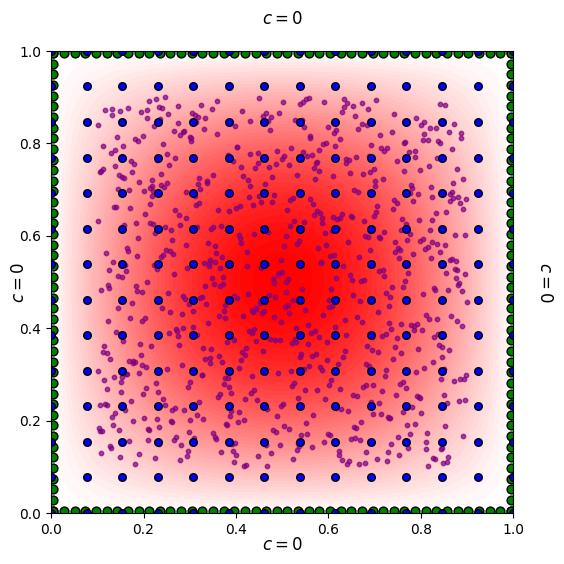

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create grid for background
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)

# Define the sinusoidal function for the colormap background
Z = np.sin(np.pi * X) * np.sin(np.pi * Y)

# Define a red-to-white colormap
colors = ["white", "red"]
cmap = LinearSegmentedColormap.from_list("white_red", colors)

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the contour background
contour = ax.contourf(X, Y, Z, levels=50, cmap=cmap)
#plt.colorbar(contour, label=r'$c(x,y) = \sin(\pi x) \sin(\pi y)$')


# Label boundary as c=0
ax.text(0.5, -0.05, r'$c = 0$', ha='center', va='top', color='black', fontsize=12)
ax.text(0.5, 1.05, r'$c = 0$', ha='center', va='bottom', color='black', fontsize=12)
ax.text(-0.05, 0.5, r'$c = 0$', ha='right', va='center', rotation=90, color='black', fontsize=12)
ax.text(1.05, 0.5, r'$c = 0$', ha='left', va='center', rotation=-90, color='black', fontsize=12)

# Overlay collocation points

# Plot PDE collocation points (LHS, red, scattered inside)
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], color='purple', s=10, alpha=0.7, label='LHS (PDE Points)')

# Plot Dirichlet boundary conditions (black, increased density)
ax.scatter(bc_points[:, 0], bc_points[:, 1], color='green', s=40, label=r'$c = 0$ (Dirichlet BC)', edgecolors='black')

# Plot Initial Condition Points (Blue)
ax.scatter(ic_points[:, 0], ic_points[:, 1], color='blue', s=30, label=r'$c(x,y,0)$ (IC)', edgecolors='black')

# Set labels and style
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("Collocation Points Overlaid on Sinusoidal Field")
#ax.legend(loc='upper right', fontsize=9, frameon=True)
ax.set_aspect('equal')

# Show plot
plt.show()


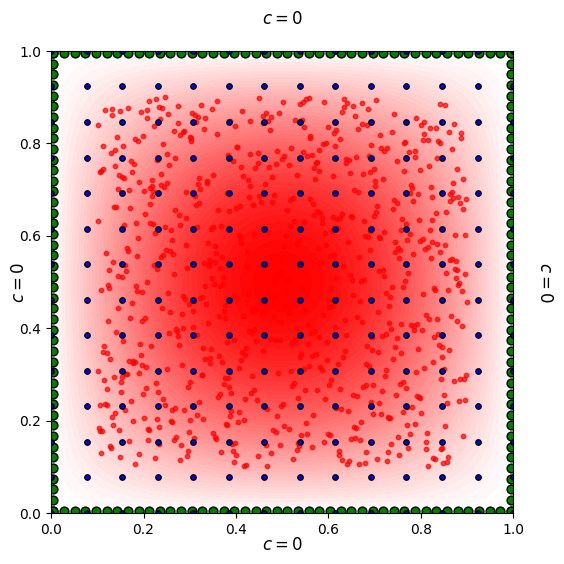

In [16]:
# Improved Visualization with Adjusted Boundary Placement & Color Scheme

# Adjust boundary point placement to prevent cutoff by slightly shifting inward
boundary_offset = 0.005  # Small offset to keep boundary points visible
bc_x = np.linspace(x_min + boundary_offset, x_max - boundary_offset, int(np.sqrt(num_bc)))
bc_y = np.linspace(y_min + boundary_offset, y_max - boundary_offset, int(np.sqrt(num_bc)))

# Re-generate boundary points with offset
bc_top = np.array([[x, y_max - boundary_offset] for x in bc_x])
bc_bottom = np.array([[x, y_min + boundary_offset] for x in bc_x])
bc_left = np.array([[x_min + boundary_offset, y] for y in bc_y])
bc_right = np.array([[x_max - boundary_offset, y] for y in bc_y])
bc_points = np.vstack([bc_top, bc_bottom, bc_left, bc_right])

# Define a blue-to-yellow colormap for better contrast
colors = ["white", "red"]
cmap = LinearSegmentedColormap.from_list("white_red", colors)

# Create figure with improved color scheme
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the background sinusoidal field
contour = ax.contourf(X, Y, Z, levels=50, cmap=cmap)


# Label boundary as c=0
ax.text(0.5, -0.05, r'$c = 0$', ha='center', va='top', color='black', fontsize=12)
ax.text(0.5, 1.05, r'$c = 0$', ha='center', va='bottom', color='black', fontsize=12)
ax.text(-0.05, 0.5, r'$c = 0$', ha='right', va='center', rotation=90, color='black', fontsize=12)
ax.text(1.05, 0.5, r'$c = 0$', ha='left', va='center', rotation=-90, color='black', fontsize=12)

# Overlay collocation points

# Plot PDE collocation points (LHS, red, scattered inside)
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], color='red', s=10, alpha=0.7, label='LHS (PDE Points)')

# Plot Dirichlet boundary conditions (black, increased density)
ax.scatter(bc_points[:, 0], bc_points[:, 1], color='green', s=40, label=r'$c = 0$ (Dirichlet BC)', edgecolors='black')

# Plot Initial Condition Points (Blue)
ax.scatter(ic_points[:, 0], ic_points[:, 1], color='blue', s=15, label=r'$c(x,y,0)$ (IC)', edgecolors='black')

# Set labels and style
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("Collocation Points Overlaid on Sinusoidal Field")
#ax.legend(loc='upper right', fontsize=9, frameon=True)
ax.set_aspect('equal')

# Show plot
plt.show()


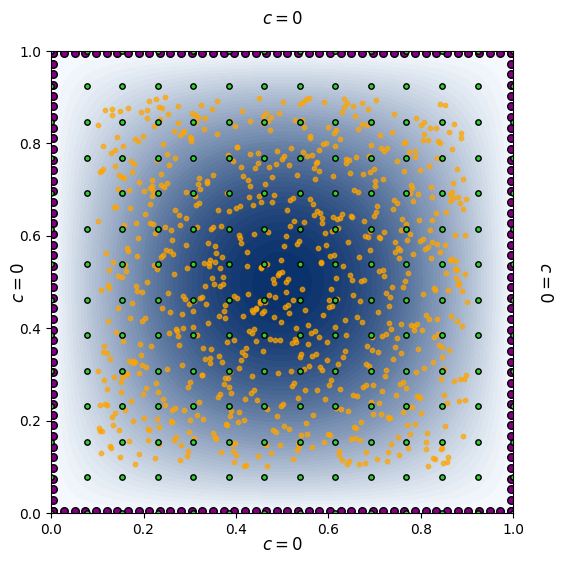

In [15]:
# Improved Visualization with Adjusted Boundary Placement & Color Scheme

# Adjust boundary point placement to prevent cutoff by slightly shifting inward
boundary_offset = 0.005  # Small offset to keep boundary points visible
bc_x = np.linspace(x_min + boundary_offset, x_max - boundary_offset, int(np.sqrt(num_bc)))
bc_y = np.linspace(y_min + boundary_offset, y_max - boundary_offset, int(np.sqrt(num_bc)))

# Re-generate boundary points with offset
bc_top = np.array([[x, y_max - boundary_offset] for x in bc_x])
bc_bottom = np.array([[x, y_min + boundary_offset] for x in bc_x])
bc_left = np.array([[x_min + boundary_offset, y] for y in bc_y])
bc_right = np.array([[x_max - boundary_offset, y] for y in bc_y])
bc_points = np.vstack([bc_top, bc_bottom, bc_left, bc_right])

# Define a blue-to-yellow colormap for better contrast
colors = ["#f7fbff", "#08306b"]  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list("blue_yellow", colors)

# Create figure with improved color scheme
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the background sinusoidal field
contour = ax.contourf(X, Y, Z, levels=50, cmap=cmap)

# Adjust boundary labels
ax.text(0.5, -0.05, r'$c = 0$', ha='center', va='top', color='black', fontsize=12)
ax.text(0.5, 1.05, r'$c = 0$', ha='center', va='bottom', color='black', fontsize=12)
ax.text(-0.05, 0.5, r'$c = 0$', ha='right', va='center', rotation=90, color='black', fontsize=12)
ax.text(1.05, 0.5, r'$c = 0$', ha='left', va='center', rotation=-90, color='black', fontsize=12)

# Overlay collocation points with improved color choices
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], color='orange', s=10, alpha=0.7, label='LHS (PDE Points)')  # Orange for LHS
ax.scatter(bc_points[:, 0], bc_points[:, 1], color='purple', s=30, label=r'$c = 0$ (Dirichlet BC)', edgecolors='black')  # Purple for BCs
ax.scatter(ic_points[:, 0], ic_points[:, 1], color='limegreen', s=15, label=r'$c(x,y,0)$ (IC)', edgecolors='black')  # Lime green for ICs

# Adjust layout and styling
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect('equal')

# Show improved plot
plt.show()